[[64  4]
 [ 3 29]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


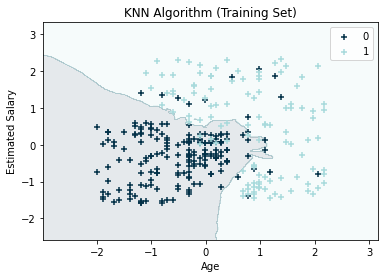

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


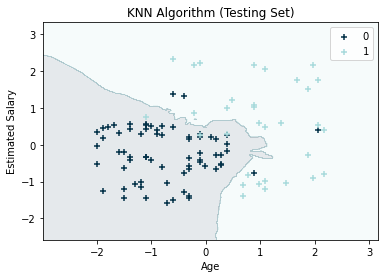

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("datasets/Social_Network_Ads.csv")

X = data[["Age", "EstimatedSalary"]]
Y = data["Purchased"]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=9, metric="minkowski", p=2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, Y_pred))

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot(X_set, Y_set, classifier, xlabel="", ylabel="", title=""):
    colors = ["#023047", "#a8dadc"]
    cmap = ListedColormap((colors[0], colors[1]))
    X, Y = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
    )
    Z = classifier.predict(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
    plt.contourf(X, Y, Z, alpha=0.1, cmap=cmap)
    for index, i in enumerate(np.unique(Y_set)):
        plt.scatter(
            x=X_set[Y_set == i, 0],
            y=X_set[Y_set == i, 1],
            alpha=1,
            c=cmap(index),
            marker="+",
            label=i,
        )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


plot(
    X_train,
    Y_train,
    classifier,
    title="KNN Algorithm (Training Set)",
    xlabel="Age",
    ylabel="Estimated Salary",
)
plot(
    X_test,
    Y_test,
    classifier,
    title="KNN Algorithm (Testing Set)",
    xlabel="Age",
    ylabel="Estimated Salary",
)
